In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [3]:
#data.variables


In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (time: 44, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2008-09-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20080801 20080901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [5]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(lon=slice(85,96),lat=slice(18,29))
#jjas_data

In [6]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean 

<xarray.DataArray 'precip' (lat: 400, lon: 1440)>
array([[0.0381104 , 0.03699899, 0.0362663 , ..., 0.03209912, 0.03759413,
        0.03926776],
       [0.03683186, 0.03541438, 0.03540602, ..., 0.03372177, 0.03821373,
        0.03799237],
       [0.03664286, 0.03578676, 0.03454726, ..., 0.03199663, 0.0354419 ,
        0.03523389],
       ...,
       [0.13431194, 0.13516451, 0.13670063, ..., 0.1315137 , 0.13232943,
        0.13263422],
       [0.12926112, 0.12957145, 0.13067223, ..., 0.1286286 , 0.12976623,
        0.12951607],
       [0.12442965, 0.12446208, 0.12697662, ..., 0.12407409, 0.12526247,
        0.12601288]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

In [7]:
#changing unit from mm/h to mm/day
pr_mm = jjas_mean*24
pr_mm

<xarray.DataArray 'precip' (lat: 400, lon: 1440)>
array([[0.9146496 , 0.8879758 , 0.8703913 , ..., 0.7703788 , 0.9022591 ,
        0.9424263 ],
       [0.8839647 , 0.84994507, 0.84974456, ..., 0.8093225 , 0.91712964,
        0.91181684],
       [0.87942874, 0.8588823 , 0.8291342 , ..., 0.76791906, 0.8506056 ,
        0.84561324],
       ...,
       [3.2234867 , 3.2439485 , 3.2808151 , ..., 3.1563287 , 3.1759064 ,
        3.1832213 ],
       [3.1022668 , 3.109715  , 3.1361337 , ..., 3.0870862 , 3.1143894 ,
        3.1083856 ],
       [2.9863117 , 2.9870899 , 3.047439  , ..., 2.9777782 , 3.0062993 ,
        3.0243092 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

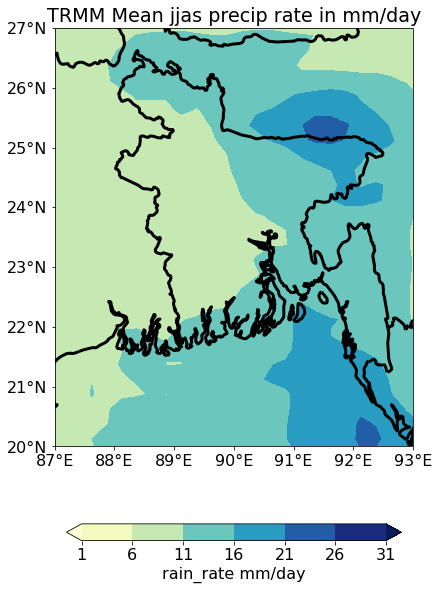

In [13]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

#ax.add_feature(cfeature.STATES)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.LAKES)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.RIVERS)


plt.title('TRMM Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_trm_jjas_mean.png")



In [14]:
annual_mean = data.precip.mean('time')
annual_mean

<xarray.DataArray 'precip' (lat: 400, lon: 1440)>
array([[0.04476201, 0.04376696, 0.04354935, ..., 0.03647194, 0.04243705,
        0.04550381],
       [0.04351989, 0.04356124, 0.04372648, ..., 0.03745295, 0.04289915,
        0.04401639],
       [0.04443063, 0.04393069, 0.04390794, ..., 0.03981588, 0.04349359,
        0.04389972],
       ...,
       [0.08689184, 0.08782186, 0.08661684, ..., 0.08346046, 0.08496572,
        0.08494511],
       [0.0825528 , 0.08305466, 0.08236539, ..., 0.0810506 , 0.08142085,
        0.08170142],
       [0.07864919, 0.07884002, 0.07942279, ..., 0.07603203, 0.07725689,
        0.07875291]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

In [15]:
#converting from mm/h to mm/day

annual_pr_mm = annual_mean*24
annual_pr_mm

<xarray.DataArray 'precip' (lat: 400, lon: 1440)>
array([[1.0742881 , 1.0504069 , 1.0451844 , ..., 0.87532663, 1.0184891 ,
        1.0920916 ],
       [1.0444775 , 1.0454698 , 1.0494355 , ..., 0.89887094, 1.0295796 ,
        1.0563935 ],
       [1.0663352 , 1.0543367 , 1.0537906 , ..., 0.9555811 , 1.0438461 ,
        1.0535934 ],
       ...,
       [2.0854042 , 2.1077247 , 2.078804  , ..., 2.003051  , 2.0391774 ,
        2.0386825 ],
       [1.9812672 , 1.9933119 , 1.9767694 , ..., 1.9452143 , 1.9541004 ,
        1.960834  ],
       [1.8875806 , 1.8921607 , 1.906147  , ..., 1.8247687 , 1.8541653 ,
        1.89007   ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

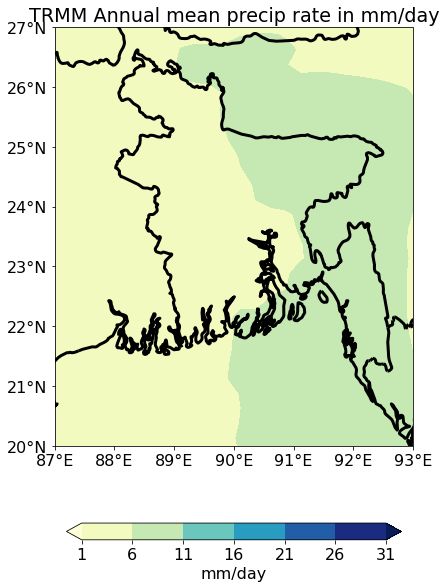

In [16]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

#ax.add_feature(cfeature.STATES)
plt.title('TRMM Annual mean precip rate in mm/day')


plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_trm_annual_mean.png")